In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
import uniflocpy.uPVT.PVT_fluids as PVT_fluids
%matplotlib inline

In [5]:
import uniflocpy.uTools.uconst as uc

In [77]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()
    

1

In [4]:
fluid_Standing.__dict__

{'gamma_gas': 0.6,
 'gamma_oil': 0.86,
 'gamma_wat': 1.0,
 'rsb_m3m3': 200.0,
 'gamma_gassp': 0,
 'y_h2s': 0,
 'y_co2': 0,
 'y_n2': 0,
 's_ppm': 0,
 'par_wat': 0,
 'p_bar': 50,
 't_c': 60,
 'pbcal_bar': -1.0,
 'tpb_C': 0.0,
 'bobcal_m3m3': 1.2,
 'muobcal_cP': 0.5,
 '_pb_bar': 336.35394922405555,
 '_bob_m3m3': 1.5303680036824185,
 '_muob_cP': 0.5699114442641007,
 '_mu_oil_cP': 2.0509613052318665,
 '_mu_gas_cP': 0.013285134506455363,
 '_mu_wat_cP': 0.4595248809564822,
 '_mu_deadoil_cP': 4.472322825574869,
 '_rho_oil_kgm3': 306.15782445027685,
 '_rho_gas_kgm3': 33.350654101813994,
 '_rho_wat_kgm3': 985.3312104550138,
 '_rs_m3m3': 20.152403829004268,
 '_bo_m3m3': 2.857349561268839,
 '_bg_m3m3': 0.021701612899890383,
 '_bw_m3m3': 1.0169019648383093,
 '_z': 0.9422671596393016,
 '_compr_oil_1bar': 0.00024986132740911624,
 '_compr_gas_1bar': 0.12363274099854189,
 '_compr_wat_1bar': 4.384403719940862e-05,
 '_heatcap_oil_': 0.0,
 '_heatcap_gas_': 0.0,
 '_heatcap_wat_': 0.0,
 '_sigma_oil_Nm': 0.0

In [104]:
fluid_Standing = PVT_fluids.FluidStanding()
p_bar = 1 
t_c = 60 
t_f = uc.c2f(t_c)
fluid_Standing.calc(p_bar, t_c)
gamma_oil = 0.8
gamma_gas = 0.6
api = uc.gamma_oil2api(gamma_oil)

Источник №1
http://fekete.com/SAN/WebHelp/Piper/WebHelp/c-te-temperature.htm

In [128]:
def heat_capacity_oil_Gambill(gamma_oil, t_c):
    t_f = uc.c2f(t_c)
    api = uc.gamma_oil2api(gamma_oil)
    return ((0.388 + 0.00045 * t_f) / gamma_oil ** (1/2) ) * 4.186
    #return ((0.388 + 0.00045 * t_c) / (gamma_oil ** (1/2)) ) * 4.186

In [106]:
    a = 0.9
    b = 1.014
    c = -0.7
    d = 2.170
    e = 1.015
    f = 0.0214

In [107]:
def heat_capacity_gas(p_bar, t_c, gamma_gas):
    p_mpa = uc.bar2MPa(p_bar)
    a = 0.9
    b = 1.014
    c = -0.7
    d = 2.170
    e = 1.015
    f = 0.0214
    return ((a * (b**t_c) * (t_c**c) + d * (e**p_mpa) * (p_mpa**f)) * ((gamma_gas / 0.60) ** 0.025))

    

In [108]:
t_c_list = range(1, 200)
heat_capacity_list, heat_capacity_list2 = [], []
p_bar = 25 
for i in t_c_list:
    heat_capacity_list.append(heat_capacity_gas(p_bar, i, gamma_gas))
    heat_capacity_list2.append(heat_capacity_gas(p_bar *10, i, gamma_gas))

In [131]:
# TODO переписать уравнение Махмуда для FIELD, надо чтоб сошлось

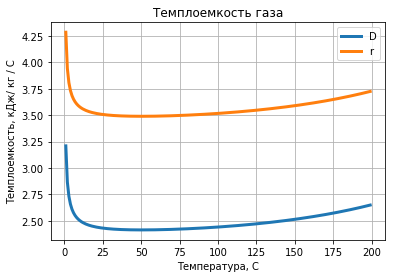

In [109]:
plt.plot(t_c_list, heat_capacity_list, linewidth=3)
plt.plot(t_c_list, heat_capacity_list2, linewidth=3)
show_example('Dr. Mahmood Moshfeghian','Темплоемкость газа', 
             'Температура, С', 'Темплоемкость, кДж/ кг / С')

In [171]:
heat_capacity_oil_1, heat_capacity_oil_2, heat_capacity_oil_3 = [], [],[]
for i in t_c_list:
    heat_capacity_oil_1.append(heat_capacity_oil_Gambill(gamma_oil, i))
    heat_capacity_oil_2.append(heat_capacity_oil_Wes_Wright(gamma_oil, i))
    heat_capacity_oil_3.append(heat_capacity_oil_Edwars(gamma_oil, i, 10))

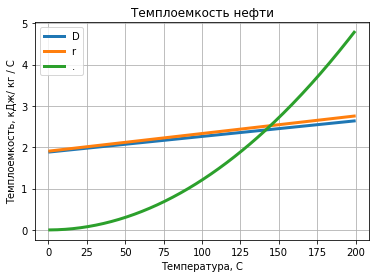

In [172]:
plt.plot(t_c_list, heat_capacity_oil_1, linewidth=3)
plt.plot(t_c_list, heat_capacity_oil_2, linewidth=3)
plt.plot(t_c_list, heat_capacity_oil_3, linewidth=3)
show_example('Dr. Mahmood Moshfeghian','Темплоемкость нефти', 
             'Температура, С', 'Темплоемкость, кДж/ кг / С')

In [127]:
def heat_capacity_oil_Wes_Wright(gamma_oil, t_c):
    return ((2 * 10** (-3) * t_c - 1.429 ) * gamma_oil + 
            (2.67 * 10** (-3)) * t_c + 3.049)
            

In [169]:
def heat_capacity_oil_Edwars(gamma_oil, t_c, k):
    t_f = uc.c2f(t_c)
    A_1 = 10**(-8) * (1 + 0.82463 * k) * (2.9027 - 0.70958 / gamma_oil)
    A_2 = 10**(-4) * (1 + 0.82463 * k) * (1.12172 - 0.27634 / gamma_oil)
    A_3 =( -1.17126 + (0.023722 + 0.024907 * gamma_oil) * k + 
          (1.14982 - 0.046535*k) / gamma_oil)
    return (A_1 + A_2 * t_c + A_3 * t_c**2) /1000
    
    